In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Retrieve html and parse
headers = {"User-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}
base_url = "https://www.sec.gov/Archives/edgar/data/946581/000162828023019851/ttwo-20230331.htm"
page = requests.get(base_url, headers=headers)
soup = BeautifulSoup(page.text, "html.parser")
s =  soup.find("span", recursive=True, string="Results of Operations")
table = s.find_next("table")
tr = table.find_all("tr")

In [9]:
# Creating Table of Operation Revenue and Expense
df_ = df = pd.DataFrame(columns=["Operation", "Dollars [2023]", "% [2023]","Dollars [2022]", "% [2022]", "Dollars [2021]", "% [2021]"])
for trs in tr[3:]:
    if trs.text:
        length = len(df)
        x = list(trs.stripped_strings)
        while "%" in x:
            x.remove("%")
        while "$" in x:
            x.remove("$")
        length = len(df)
        df.loc[length] = x
df         

,Operation,Dollars [2023],% [2023],Dollars [2022],% [2022],Dollars [2021],% [2021]
0,Total net revenue,"5,349.9",100.0,"3,504.8",100.0,"3,372.8",100.0
1,Cost of revenue,"3,064.6",57.3,"1,535.4",43.8,"1,535.1",45.5
2,Gross profit,"2,285.3",42.7,"1,969.4",56.2,"1,837.7",54.5
3,Selling and marketing,"1,592.6",29.8,516.4,14.7,445.0,13.2
4,Research and development,892.5,16.7,406.6,11.6,317.3,9.4
5,General and administrative,843.1,15.8,511.7,14.6,390.4,11.6
6,Depreciation and amortization,122.3,2.3,61.1,1.7,55.6,1.6
7,Total operating expenses,"3,450.5",64.5,"1,495.8",42.7,"1,208.3",35.8
8,(Loss) income from operations,"(1,165.2)",(21.8),473.6,13.5,629.4,18.7
9,"Interest and other, net",(141.9),(2.7),(14.2),(0.4),8.8,0.3


In [ ]:
# Create Table of Revenue Sources
df_source = pd.DataFrame(columns=["Operation", "Dollars [2023]", "% [2023]","Dollars [2022]", "% [2022]", "Dollars [2021]", "% [2021]"])
table1 = table.find_next("table")
tr1 = table1.find_all("tr")
for trs in tr1[3:]:
    if trs.text:
        geo_list = list(trs.stripped_strings)
        while "%" in geo_list:
            geo_list.remove("%")
        while "$" in geo_list:
            geo_list.remove("$")
        length = len(df_source)
        if len(geo_list)<7:
            continue
        else:
            length = len(df_source)
            df_source.loc[length] = geo_list
df_source

,Operation,Dollars [2023],% [2023],Dollars [2022],% [2022],Dollars [2021],% [2021]
0,United States,"3,360.0",62.8,"2,100.2",59.9,"2,015.9",59.8
1,International,"1,989.9",37.2,"1,404.6",40.1,"1,356.9",40.2
2,Mobile,"2,538.6",47.5,403.4,11.5,274.1,8.1
3,Console,"2,303.8",43.1,"2,528.9",72.2,"2,517.0",74.6
4,PC and other,507.5,9.5,572.5,16.3,581.7,17.2
5,Digital online,"5,085.7",95.1,"3,149.0",89.8,"2,972.4",88.1
6,Physical retail and other,264.2,4.9,355.8,10.2,400.4,11.9
7,Recurrent consumer spending,"4,180.4",78.1,"2,271.2",64.8,"2,152.0",63.8
8,Full game and other,"1,169.5",21.9,"1,233.6",35.2,"1,220.8",36.2


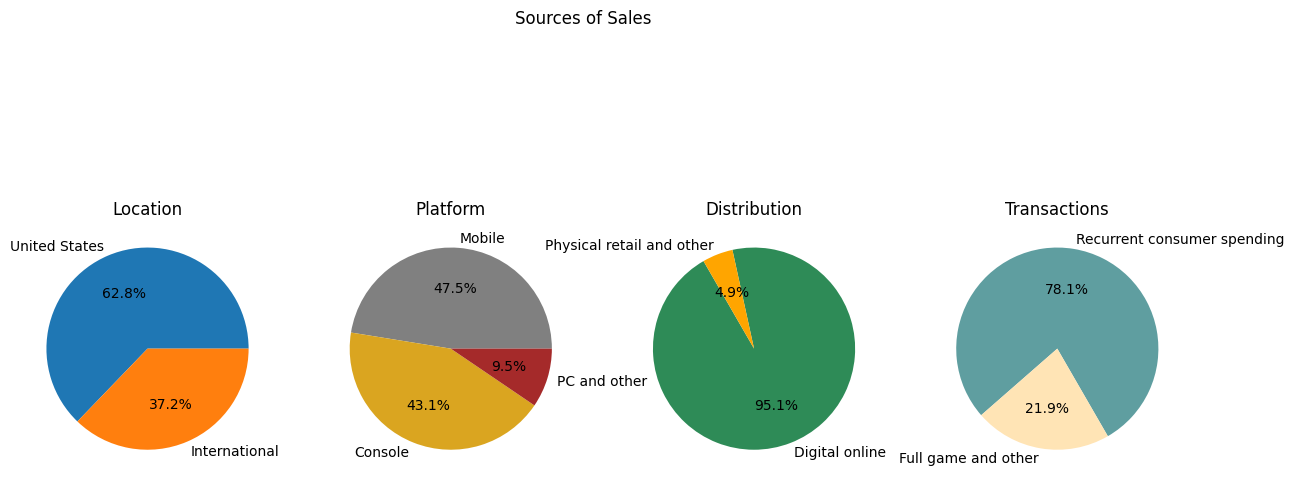

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(15,7),sharey="row")
fig.suptitle("Sources of Sales")
ax[0].pie(df_source["% [2023]"].iloc[:2], labels=df_source["Operation"].iloc[:2],autopct='%1.1f%%')
ax[1].pie(df_source["% [2023]"].iloc[2:5], labels=df_source["Operation"].iloc[2:5], autopct='%1.1f%%', colors= ['gray', 'goldenrod', 'brown'])
ax[2].pie(df_source["% [2023]"].iloc[5:7], labels=df_source["Operation"].iloc[5:7], autopct='%1.1f%%', colors= ['seagreen', 'orange'], startangle=120)
ax[3].pie(df_source["% [2023]"].iloc[7:], labels=df_source["Operation"].iloc[7:], autopct='%1.1f%%', colors= ['cadetblue', 'moccasin'], startangle=300)

ax[0].set_title("Location")
ax[1].set_title("Platform")
ax[2].set_title("Distribution")
ax[3].set_title("Transactions")
plt.show()

In [ ]:
# Assets Table
s =  soup.find("span", recursive=True, string="Definition and Limitations of Internal Control Over Financial Reporting")
table_BS = s.find_next("table")
tr = table_BS.find_all("tr")
df_ca = pd.DataFrame(columns=["Assets", "2023", "2022"])
for trs in tr[5:22]:
    if trs.text:
        ca_list = list(trs.stripped_strings)
        while "%" in ca_list:
            ca_list.remove("%")
        while "$" in ca_list:
            ca_list.remove("$")
        if len(ca_list) != 3:
            ca_list = [ca_list[0], ca_list[-2], ca_list[-1]]
        length = len(df_ca)
        df_ca.loc[length] = ca_list
df_ca

,Assets,2023,2022
0,Cash and cash equivalents,827.4,"1,732.1"
1,Short-term investments,187.0,820.1
2,Restricted cash and cash equivalents,307.6,359.8
3,"Accounts receivable, net of allowances of $",763.2,579.4
4,Software development costs and licenses,65.9,81.4
5,Contract assets,79.9,104.9
6,Prepaid expenses and other,277.1,193.4
7,Total current assets,"2,508.1","3,871.1"
8,"Fixed assets, net",402.8,242.0
9,Right-of-use assets,282.7,217.2


In [ ]:
# Liabilities Table
df_l = pd.DataFrame(columns=["Liabilities", "2023", "2022"])
for trs in tr[24:37]:
    if trs.text:
        l_list = list(trs.stripped_strings)
        while "%" in l_list:
            l_list.remove("%")
        while "$" in l_list:
            l_list.remove("$")
        length = len(df_l)
    df_l.loc[length] = l_list
df_l

,Liabilities,2023,2022
0,Accounts payable,140.1,125.9
1,Accrued expenses and other current liabilities,"1,225.7","1,074.9"
2,Deferred revenue,"1,078.8",865.3
3,Lease liabilities,60.2,38.9
4,"Short-term debt, net","1,346.8",—
5,Total current liabilities,"3,851.6","2,105.0"
6,"Long-term debt, net","1,733.0",—
7,Non-current deferred revenue,35.5,70.9
8,Non-current lease liabilities,347.0,211.3
9,Non-current software development royalties,110.2,115.5


In [ ]:
# Owner's Equity Table
df_oe = pd.DataFrame(columns=["Owner's Equity", "2023", "2022"])
for trs in tr[39:]:
    if trs.text:
        oe_list = list(trs.stripped_strings)
        while "%" in oe_list:
            oe_list.remove("%")
        while "$" in oe_list:
            oe_list.remove("$")
        if oe_list[-1] == ")":
            oe_list[-2] = "-" + oe_list[-2]
            oe_list[-5] = "-" + oe_list[-5]
            oe_list = [oe_list[0], oe_list[-5], oe_list[-5]]
        if len(oe_list) != 3:
            oe_list = oe_list = [oe_list[0], oe_list[-2], oe_list[-1]]
        length = len(df_oe)
        df_oe.loc[length] = oe_list
df_oe

,Owner's Equity,2023,2022
0,"Preferred stock, $",—,—
1,"Common stock, $",1.9,1.4
2,Additional paid-in capital,"9,010.2","2,597.2"
3,"Treasury stock, at cost;","-1,020.6","-1,020.6"
4,Retained earnings,"1,164.3","2,289.0"
5,Accumulated other comprehensive loss,-113.3,-113.3
6,Total stockholders' equity,"9,042.5","3,809.7"
7,Total liabilities and stockholders' equity,"15,862.1","6,546.3"


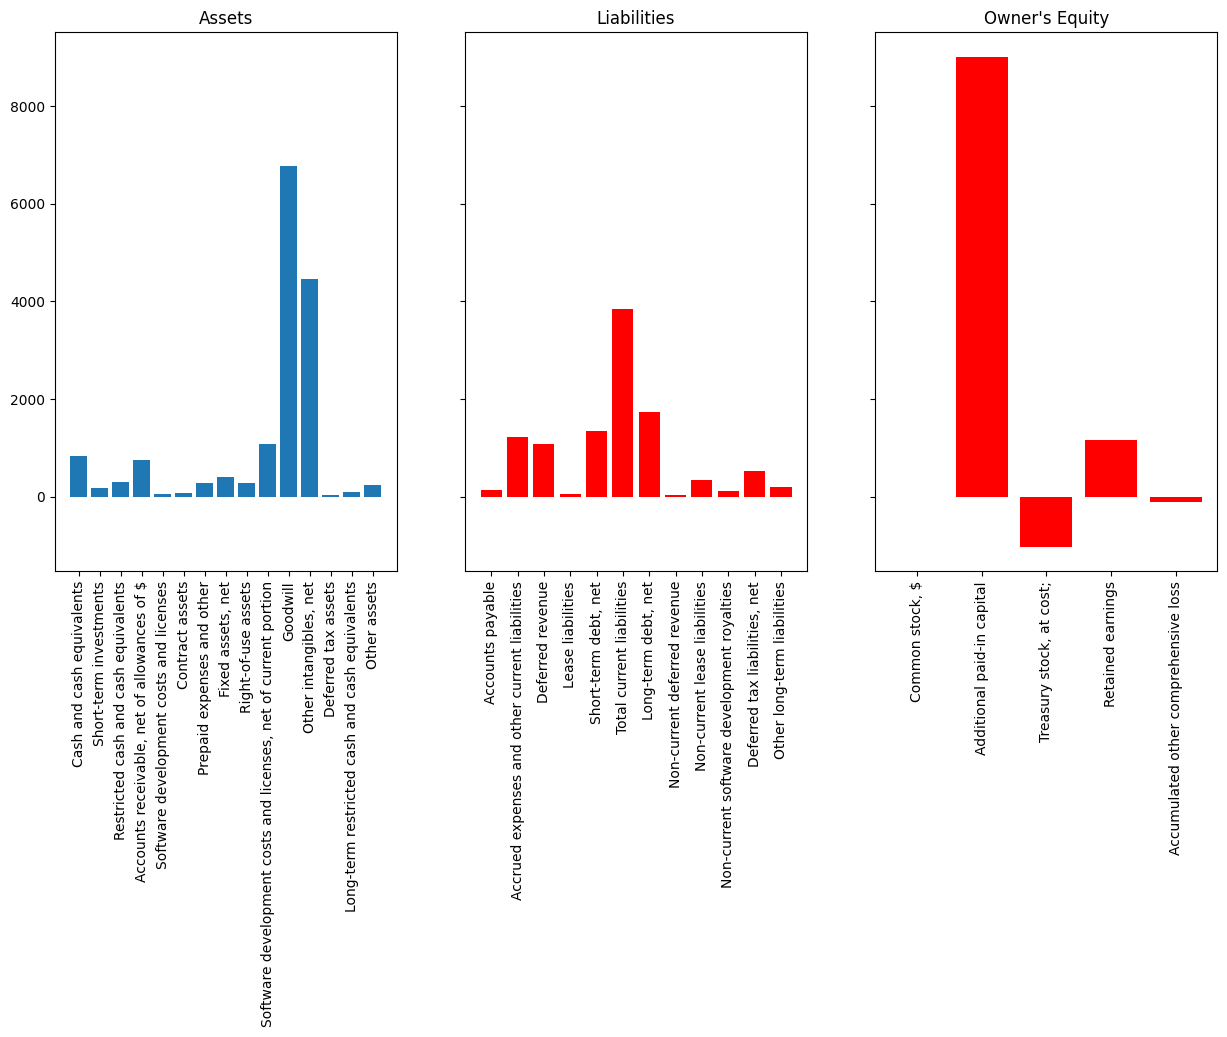

In [ ]:
# Plotting Barchats of Balance Sheet
df_ca = df_ca.drop(index=[7,16])
df_l = df_l.drop(12)
df_oe = df_oe.drop([0,6,7])
a_values = df_ca["2023"].replace(',','', regex=True).astype("float")
l_values = df_l["2023"].replace(',','', regex=True).astype("float")
oe_values = df_oe["2023"].replace(',','', regex=True).astype("float")

fig, ax = plt.subplots(ncols=3, figsize=(15,7),sharey="row")
ax[0].bar(df_ca["Assets"], a_values)
ax[1].bar(df_l["Liabilities"], l_values, color="red")
ax[2].bar(df_oe["Owner's Equity"], oe_values, color="red")

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_title("Assets")
ax[1].set_title("Liabilities")
ax[2].set_title("Owner's Equity")
plt.show()